# TD SARSA (On-Policy) vs TD Q-learning (Off-Policy)

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib.envs.cliff_walking import CliffWalkingEnv
from lib import plotting

matplotlib.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
env = CliffWalkingEnv()

## Q-learning

Episode 500/500.

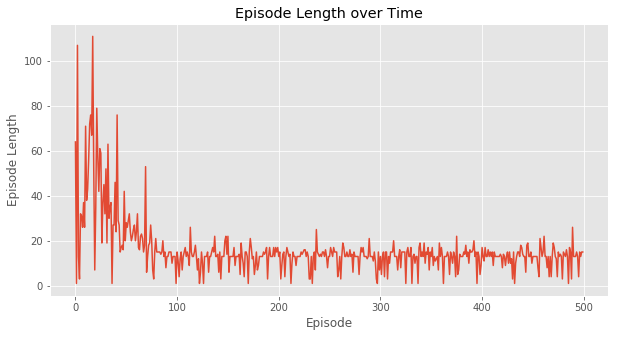

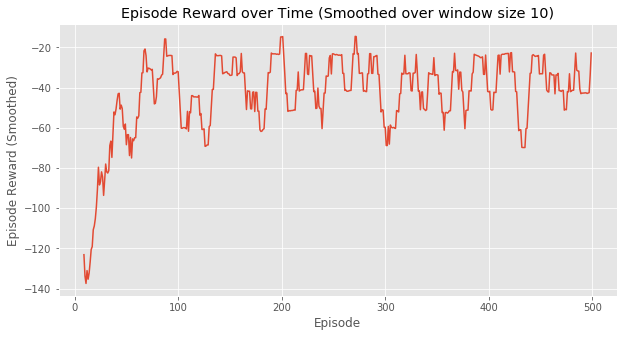

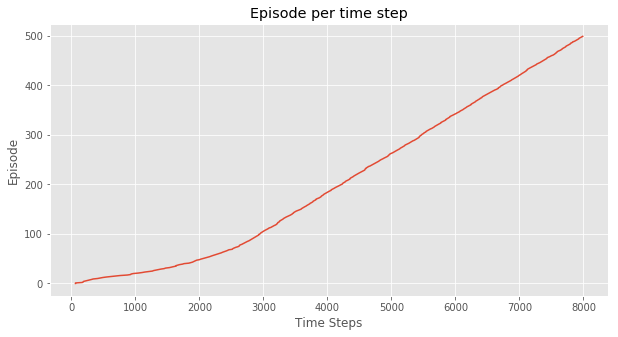

(<matplotlib.figure.Figure at 0x11201e9e8>,
 <matplotlib.figure.Figure at 0x116555c18>)

In [5]:
from q_learning import q_learning
Q_q_learning, stats_q_learning = q_learning(env, 500, discount_factor=1.0, alpha=0.5, epsilon=0.1)
plotting.plot_episode_stats(stats_q_learning)

## SARSA

Episode 3000/3000.

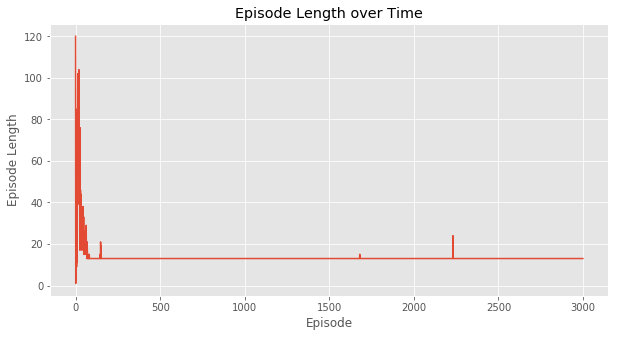

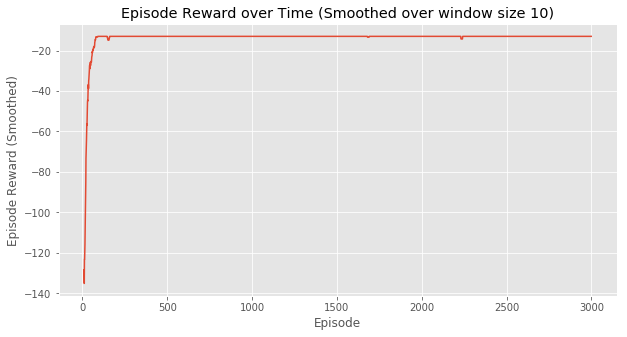

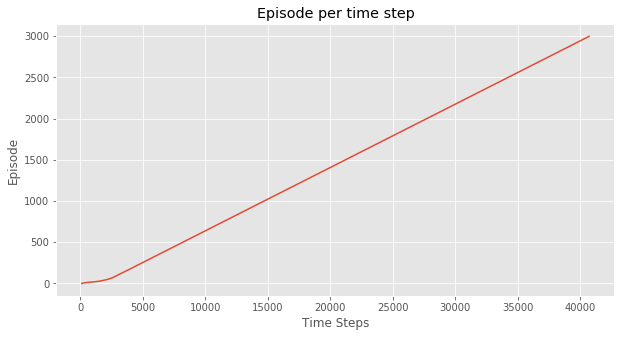

(<matplotlib.figure.Figure at 0x116cd3240>,
 <matplotlib.figure.Figure at 0x117f82be0>)

In [18]:
from sarsa import sarsa
Q_sarsa, stats_sarsa = sarsa(env, 3000, discount_factor=1.0, alpha=0.5, epsilon=0.1)
plotting.plot_episode_stats(stats_sarsa)

## Haben sie den gleichen Weg gelernt?

### Q-learning

In [8]:
state = env.reset()
while True:
    action = np.argmax(Q_q_learning[state])
    print(Q_q_learning[state])   
    state, reward, done, _ = env.step(action)
    env.render()

    if done:
        break

[-13.         -99.99961853 -13.99999465 -13.99971619]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[-13.15600197 -12.         -13.99866514 -12.99996862]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[-12.87911627 -11.         -99.99694824 -12.99938446]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[-11.9115667  -10.         -99.99389648 -11.99957825]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[-10.98489094  -9.         -99.609375   -10.99757669]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[ -9.98575258  -8.       

### SARSA

In [19]:
state = env.reset()
while True:
    action = np.argmax(Q_sarsa[state])
    print(Q_sarsa[state])
    state, reward, done, _ = env.step(action)
    env.render()
    if done:
        break

[-13.  -50.  -13.5 -13.5]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[-12.43626705 -12.         -12.85228081 -12.5       ]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[-11.64073094 -11.         -50.         -11.74966963]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[-10.41977003 -10.         -50.         -11.16979671]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[ -9.77306203  -9.         -50.          -9.87471741]
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

[ -8.59738648  -8.         -50.          -8.8585263 ]